In [1]:
import numpy as np
from numpy import *
import pandas as pd
import h5py
import os
import re
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.signal as signal
import scipy.io as sio
import scipy.stats
from scipy.fft import fft
import neurokit2 as nk
import heartpy as hp
import nolds
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
import nolds

In [2]:
import sys
sys.path.append('/Users/jinyanwei/Desktop/BP_Model/Jinyw_code/')
from read_data import open_data
from filter_and_clean_data import clean_data
from segment_and_features import features_data
from random_forest import run_random_forest

all_data = open_data('/Users/jinyanwei/Desktop/BP_Model/Data/UCI/Part_1.mat')

In [5]:
# Input Type: array

class SelectData:
    def __init__(self, data_array, data_begin=0, data_end=-1):
        self.array = data_array[data_begin:data_end]

    def signal_data(self): # PPG, BP, ECG
        return self.array[:,0], self.array[:,1], self.array[:,2]

    def show_data(self, show_begin=0, show_end=-1):
        fig, ax = plt.subplots(figsize=(30,6))
        ax.plot(self.array[show_begin:show_end])
        plt.show(fig)

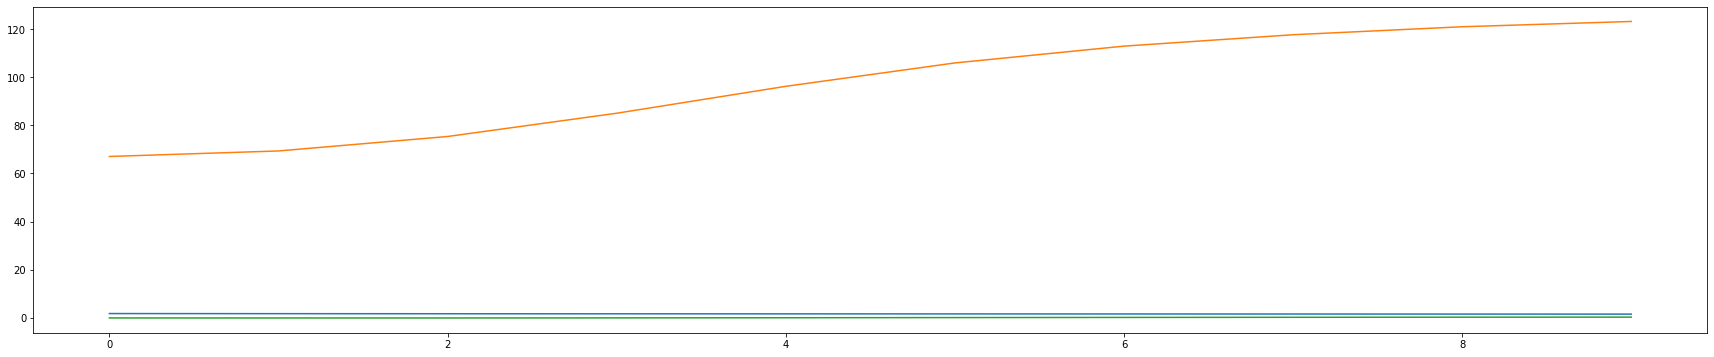

(array([1.75953079, 1.71847507, 1.68426197, ..., 1.70087977, 1.64418377,
        1.6001955 ]),
 array([67.06295517, 69.35862807, 75.36645289, ..., 74.53610312,
        76.44102319, 81.81387466]),
 array([-0.06060606, -0.07526882, -0.07038123, ..., -0.08553275,
        -0.1001955 , -0.09042033]))

In [6]:
patient = SelectData(all_data[0])
patient.show_data(0,10)
ppg, bp, ecg = patient.signal_data()
ppg, bp, ecg